<a href="https://colab.research.google.com/github/sutanto5/Amazon_WebScraper/blob/main/Amazon_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This model will be used to run sentiment analysis on my book review data

# **NLTK Basics**

In [78]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.style.use('ggplot')

#downloads
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [79]:
#import data
df_hillbilly = pd.read_csv('hillbilly.csv')
df_anxious = pd.read_csv('anxious.csv')
df_body = pd.read_csv('body.csv')
df_melania = pd.read_csv('melania.csv')
df_tyranny = pd.read_csv('tyranny.csv')

print(df_hillbilly.head())
print(df_anxious.head())
print(df_body.head())
print(df_melania.head())
print(df_tyranny.head())

             User Name       Review Date  Rating  \
0                PRNLM     July 25, 2016     5.0   
1            J. Foster   August 12, 2017     4.0   
2          Ted Lehmann     July 13, 2017     5.0   
3              Fnu Lnu  December 9, 2016     5.0   
4  Richard B. Schwartz      July 3, 2017     5.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [18]:
#shape for all
df_hillbilly.shape

(100, 4)

In [7]:
df_hillbilly['Rating'].describe()

,Rating
count,100.00000
mean,4.85000
std,0.55732
min,1.00000
25%,5.00000
50%,5.00000
75%,5.00000
max,5.00000


In [8]:
df_anxious['Rating'].describe()

,Rating
count,100.000000
mean,4.830000
std,0.450701
min,3.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
df_body['Rating'].describe()

,Rating
count,100.000000
mean,4.820000
std,0.479478
min,3.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:

df_tyranny['Rating'].describe()

,Rating
count,100.00000
mean,4.85000
std,0.55732
min,1.00000
25%,5.00000
50%,5.00000
75%,5.00000
max,5.00000


In [11]:
df_melania['Rating'].describe()


,Rating
count,100.000000
mean,4.810000
std,0.464823
min,3.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


# **EDA**

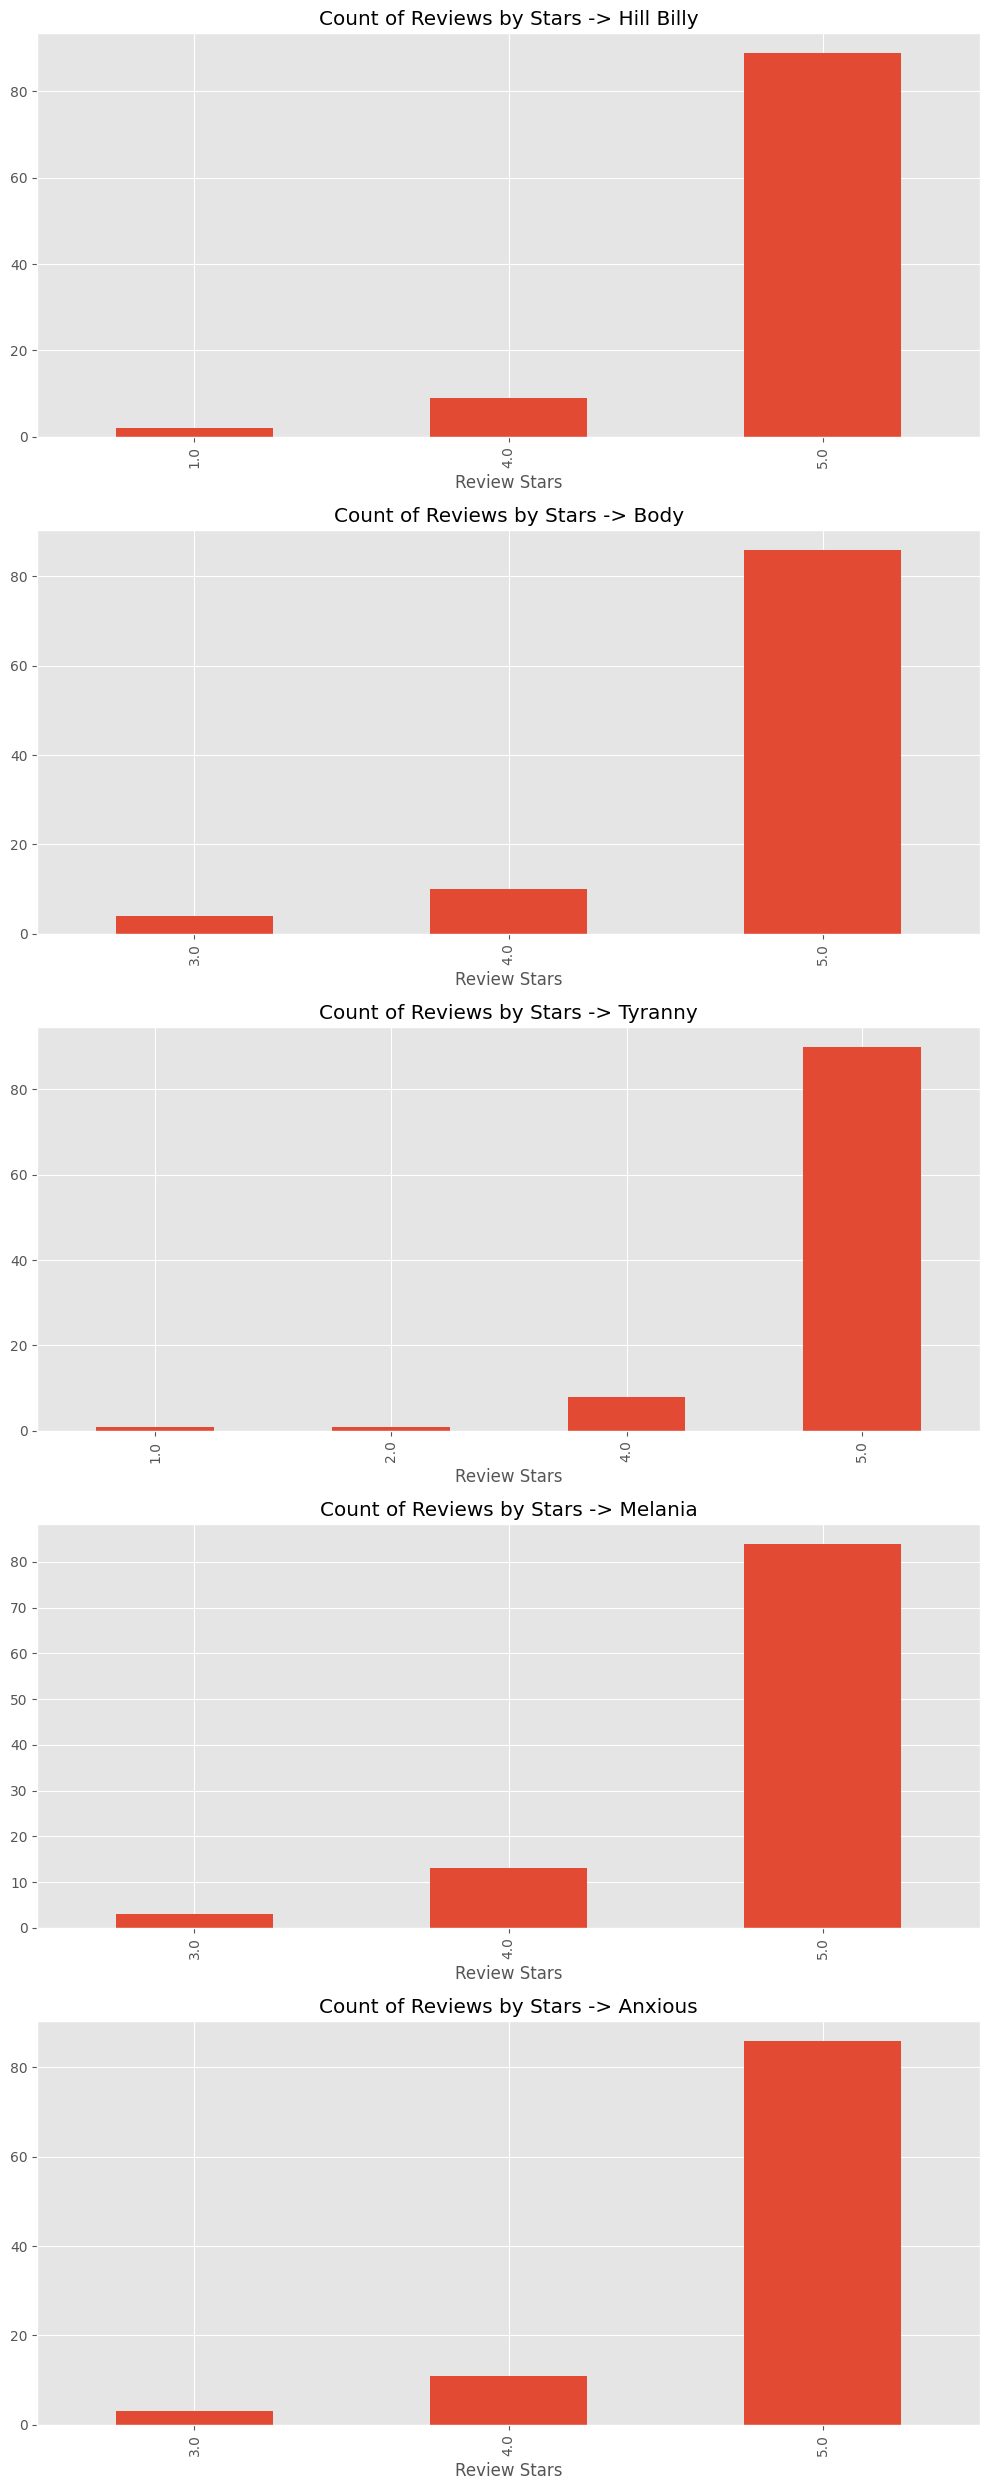

In [5]:
import matplotlib.pyplot as plt

#all separate

# Create a figure with 5 subplots (one column, 5 rows)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 25))

# Plot for df_hillbilly
df_hillbilly['Rating'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of Reviews by Stars -> Hill Billy',
    ax=axes[0]
)
axes[0].set_xlabel('Review Stars')

# Plot for df_body
df_body['Rating'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of Reviews by Stars -> Body',
    ax=axes[1]
)
axes[1].set_xlabel('Review Stars')

# Plot for df_tyranny
df_tyranny['Rating'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of Reviews by Stars -> Tyranny',
    ax=axes[2]
)
axes[2].set_xlabel('Review Stars')

# Plot for df_melania
df_melania['Rating'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of Reviews by Stars -> Melania',
    ax=axes[3]
)
axes[3].set_xlabel('Review Stars')

# Plot for df_anxious
df_anxious['Rating'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of Reviews by Stars -> Anxious',
    ax=axes[4]
)
axes[4].set_xlabel('Review Stars')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


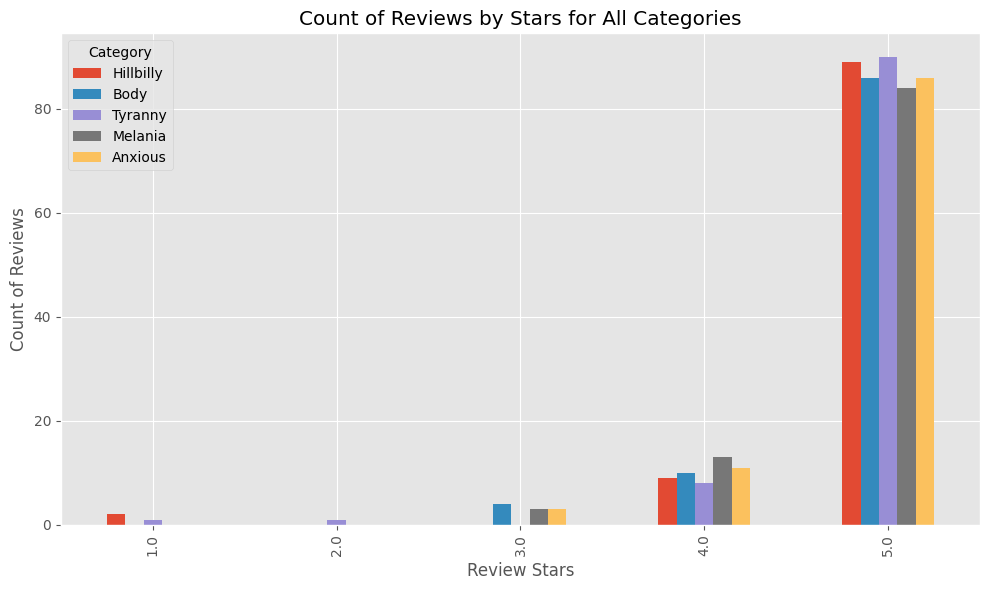

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# all combined

# Calculate rating counts for each category and sort by index (i.e. rating value)
ratings_hillbilly = df_hillbilly['Rating'].value_counts().sort_index()
ratings_body = df_body['Rating'].value_counts().sort_index()
ratings_tyranny = df_tyranny['Rating'].value_counts().sort_index()
ratings_melania = df_melania['Rating'].value_counts().sort_index()
ratings_anxious = df_anxious['Rating'].value_counts().sort_index()

# Combine all the series into one DataFrame
ratings_combined = pd.DataFrame({
    'Hillbilly': ratings_hillbilly,
    'Body': ratings_body,
    'Tyranny': ratings_tyranny,
    'Melania': ratings_melania,
    'Anxious': ratings_anxious
})

# Plot a grouped bar chart
ratings_combined.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Review Stars')
plt.ylabel('Count of Reviews')
plt.title('Count of Reviews by Stars for All Categories')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

#all combined

# **Book Positive Words**

(-0.5, 1499.5, 799.5, -0.5)

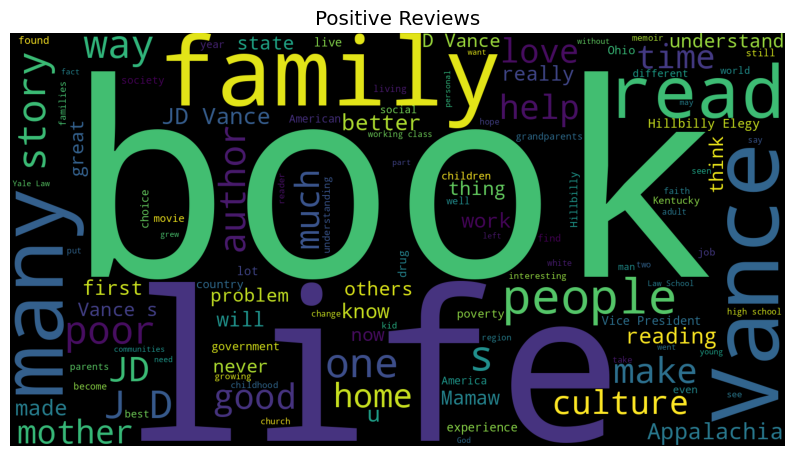

In [20]:
sentences=df_hillbilly['Review Body']
pos=' '.join(map(str,sentences[df_hillbilly['Rating']>=3]))
neg=' '.join(map(str,sentences[df_hillbilly['Rating']<=2]))

pos_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = STOPWORDS,
                min_font_size = 15).generate(pos)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Hillbilly')
plt.axis('off')

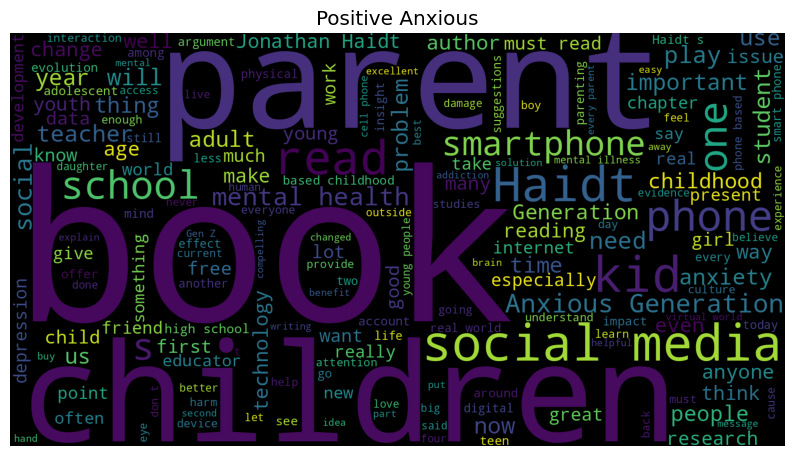

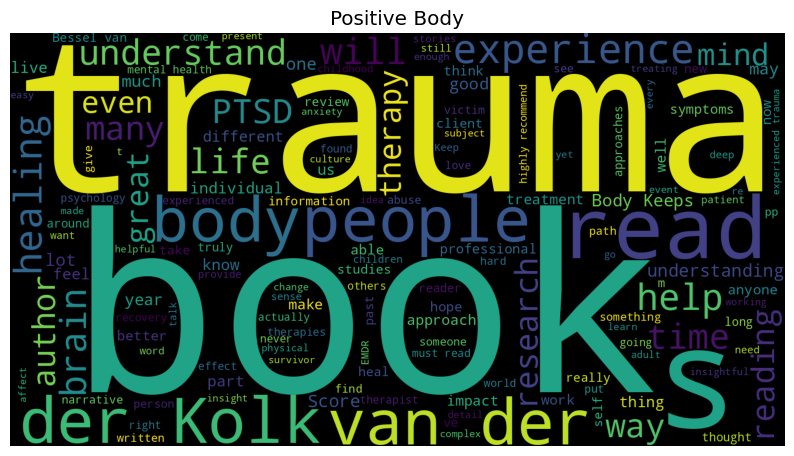

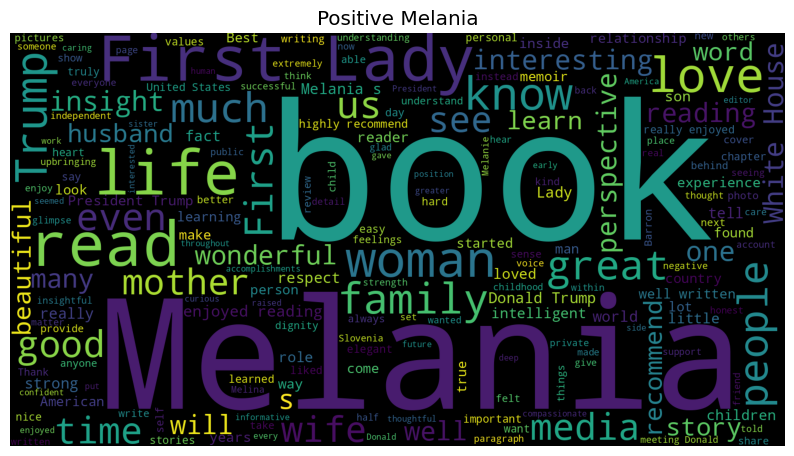

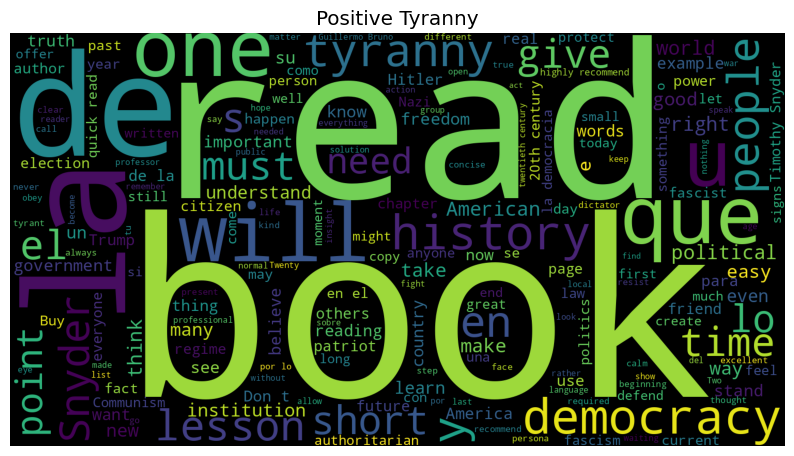

In [22]:
# prompt: generate word cloud for each df

# Function to generate and display word clouds
def generate_wordcloud(df, title):
    sentences = df['Review Body']
    pos = ' '.join(map(str, sentences[df['Rating'] >= 3]))

    pos_wordcloud = WordCloud(width=1500, height=800,
                              background_color='black',
                              stopwords=STOPWORDS,
                              min_font_size=15).generate(pos)

    plt.figure(figsize=(10, 10))
    plt.imshow(pos_wordcloud)
    plt.title(f'Positive {title}')
    plt.axis('off')
    plt.show()

# Generate word clouds for each DataFrame
generate_wordcloud(df_anxious, "Anxious")
generate_wordcloud(df_body, "Body")
generate_wordcloud(df_melania, "Melania")
generate_wordcloud(df_tyranny, "Tyranny")


# * Negative Word Clouds**

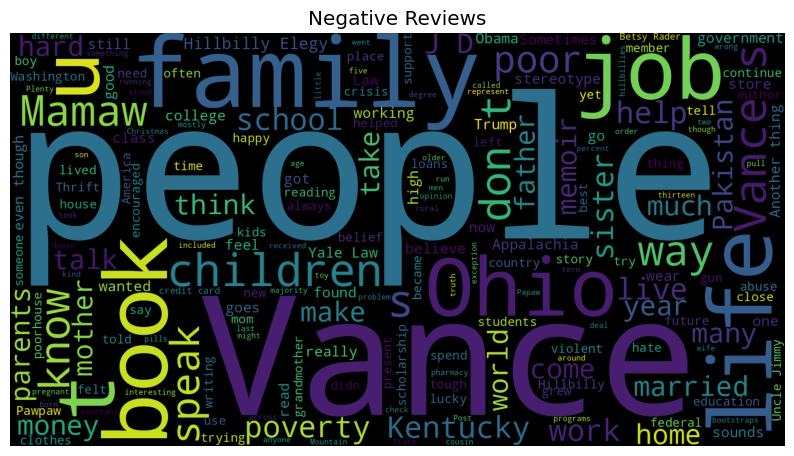

In [23]:
neg_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = STOPWORDS,
                min_font_size = 15).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Hilbilly Negative')
plt.axis('off')
plt.show()

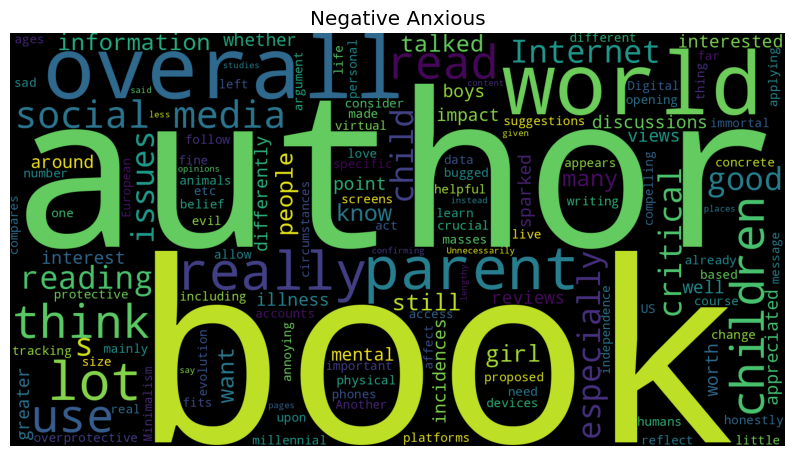

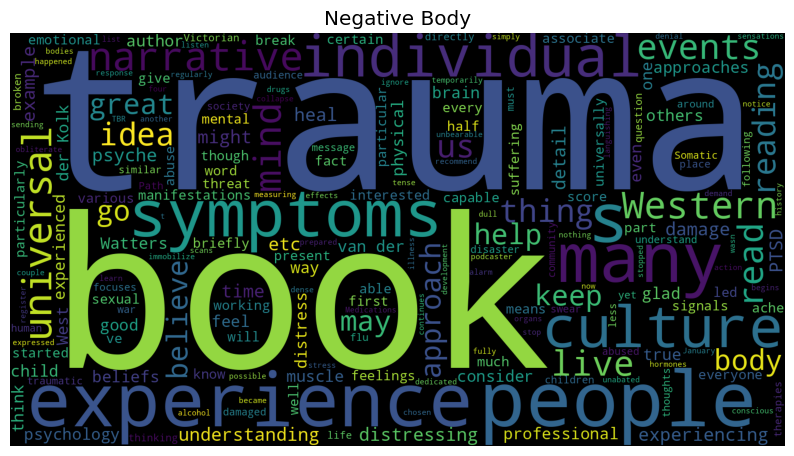

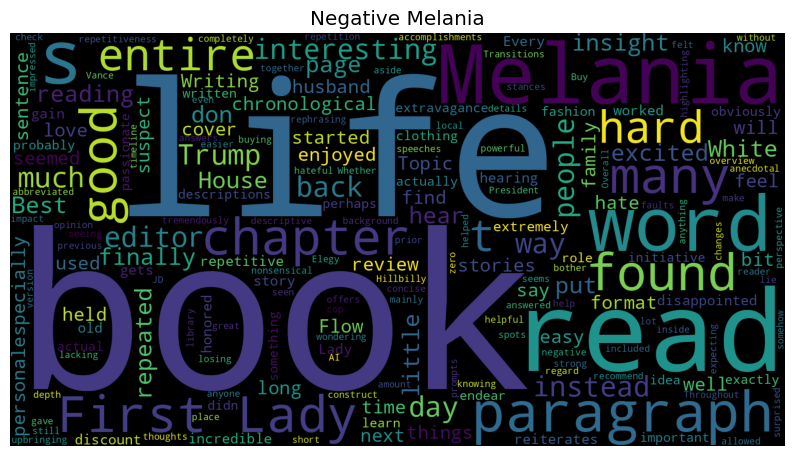

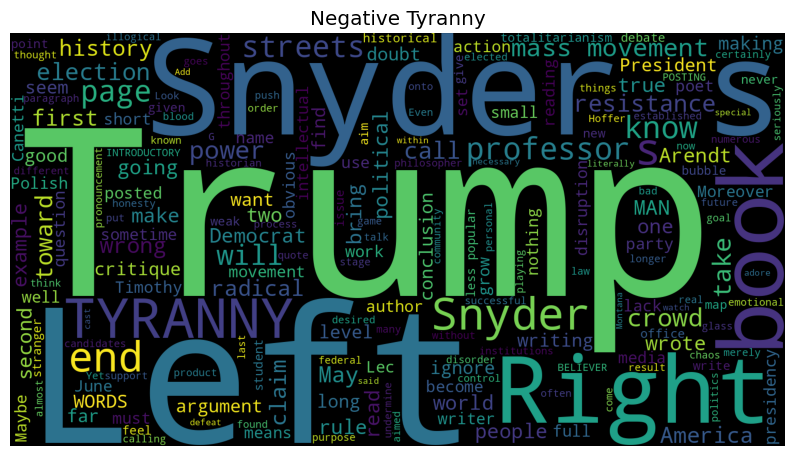

In [26]:
# prompt: generate code for the rest of them fror negative word clouds

# Function to generate and display negative word clouds
def generate_negative_wordcloud(df, title):
    sentences = df['Review Body']
    neg = ' '.join(map(str, sentences[df['Rating'] <= 3]))

    neg_wordcloud = WordCloud(width=1500, height=800,
                              background_color='black',
                              stopwords=STOPWORDS,
                              min_font_size=15).generate(neg)

    plt.figure(figsize=(10, 10))
    plt.imshow(neg_wordcloud)
    plt.title(f'Negative {title}')
    plt.axis('off')
    plt.show()

# Generate negative word clouds for each DataFrame
generate_negative_wordcloud(df_anxious, "Anxious")
generate_negative_wordcloud(df_body, "Body")
generate_negative_wordcloud(df_melania, "Melania")
generate_negative_wordcloud(df_tyranny, "Tyranny")


# **Word Count Stats**

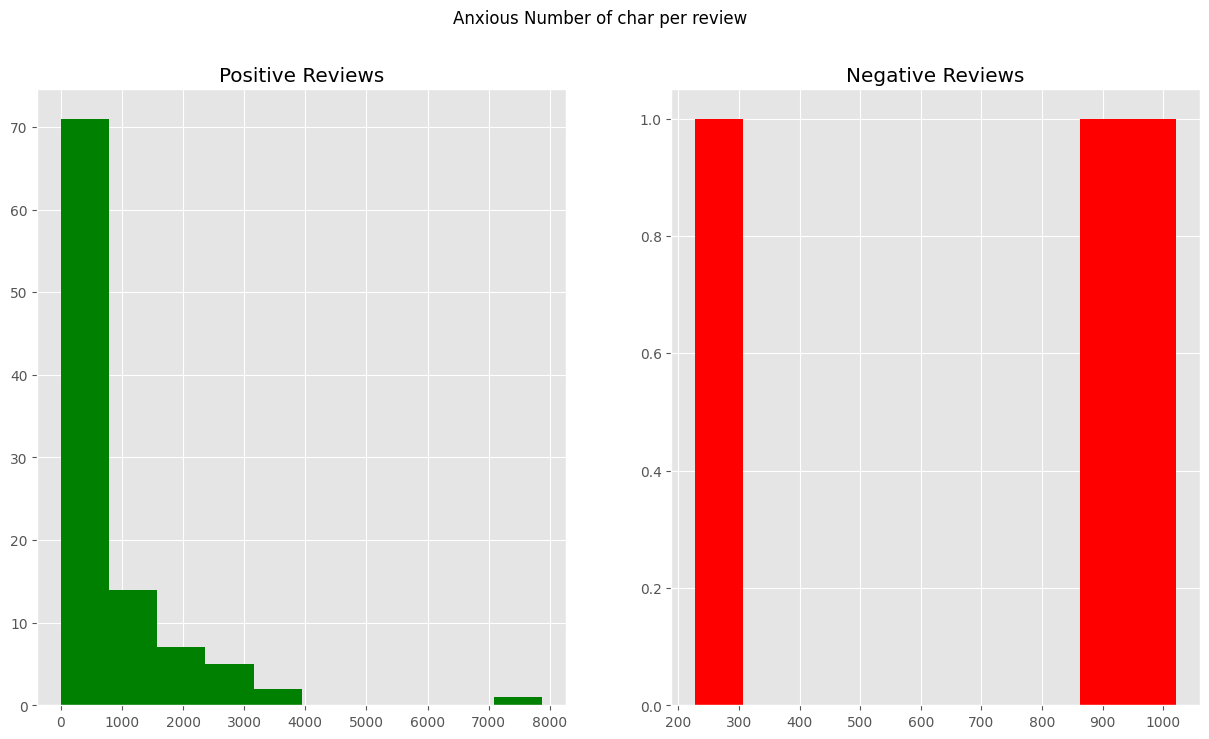

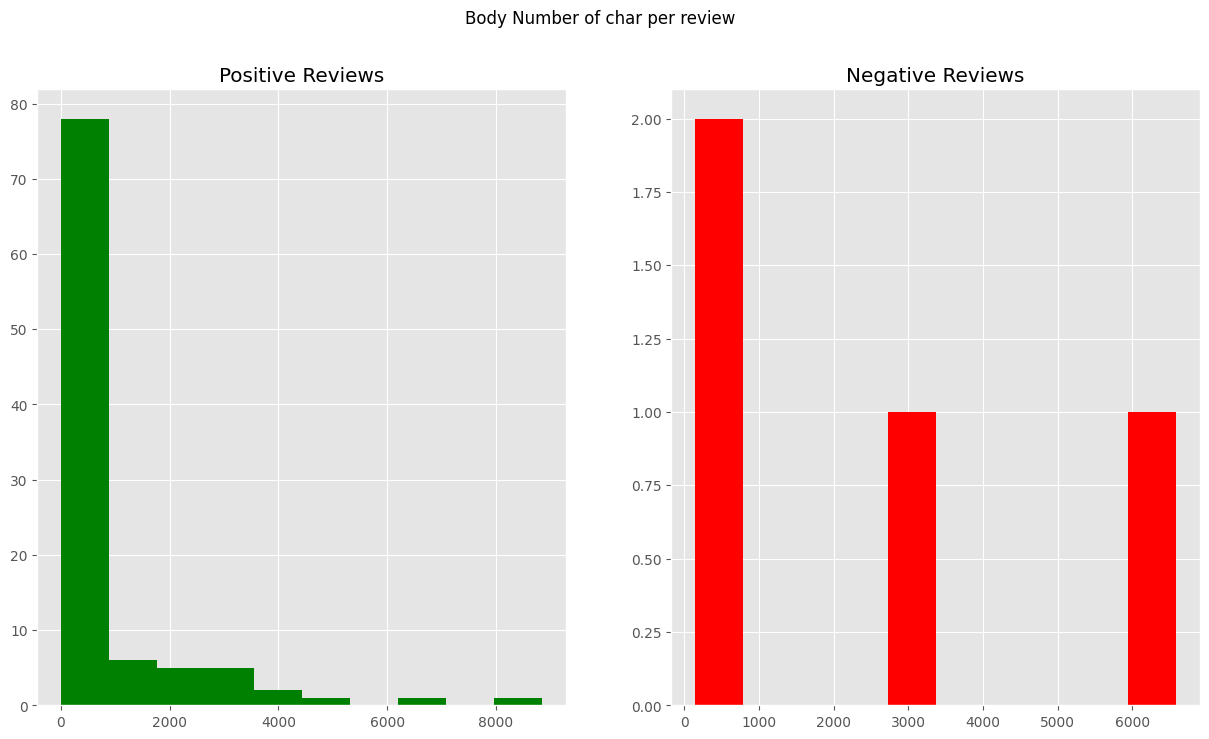

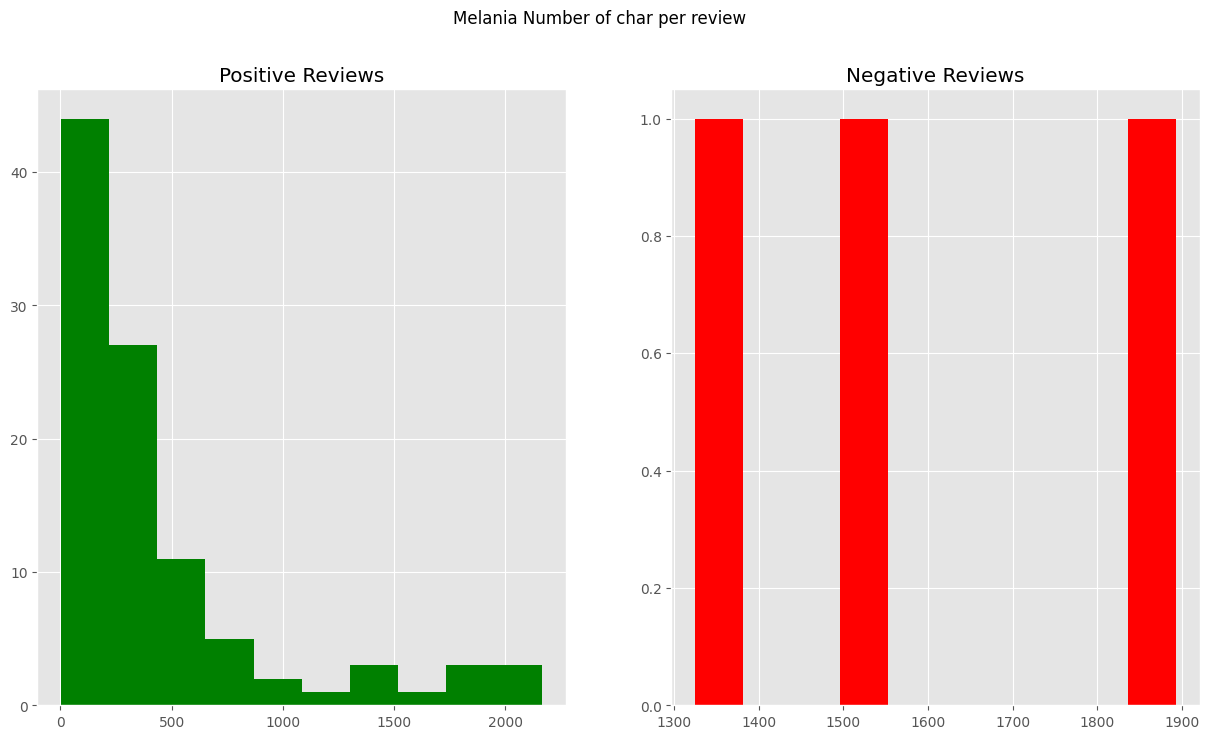

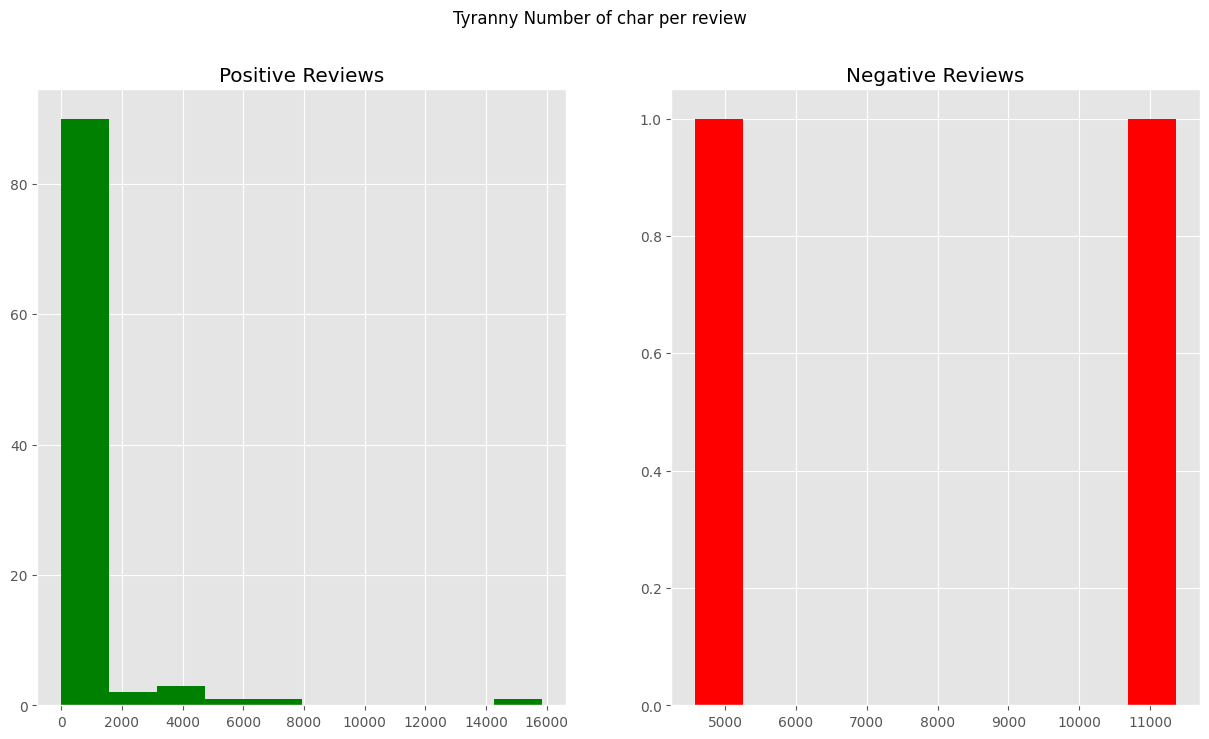

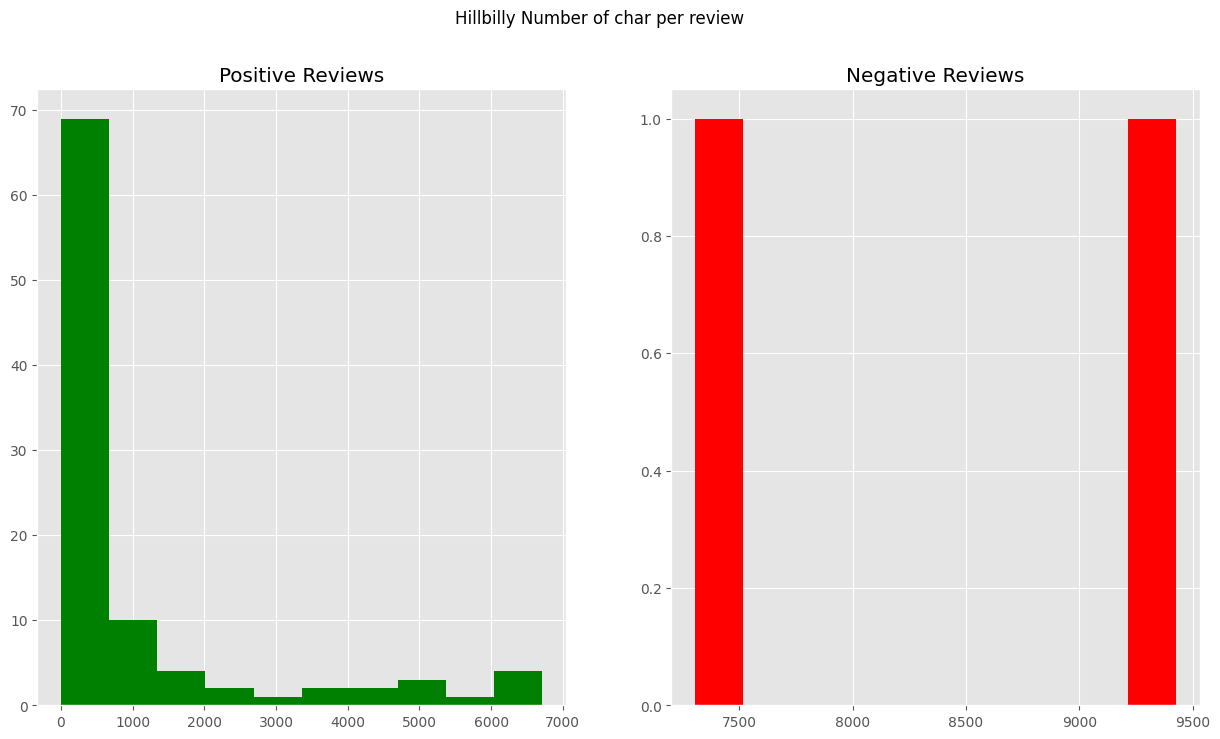

In [42]:
df_hillbilly.name = "Hillbilly"
df_anxious.name = "Anxious"
df_body.name = "Body"
df_melania.name = "Melania"
df_tyranny.name = "Tyranny"

def wordcount(df):
  #Visulaization of number of charactor in reviews
  figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
  len_pos_review=df[df['Rating']>=3]['Review Body'].str.len()
  pos_ax.hist(len_pos_review,color='green')
  pos_ax.set_title('Positive Reviews')
  len_neg_review=df[df['Rating']<=3]['Review Body'].str.len()
  neg_ax.hist(len_neg_review,color='red')
  neg_ax.set_title('Negative Reviews')
  figure.suptitle(df.name + " Number of char per review")
  plt.show()

wordcount(df_anxious)
wordcount(df_body)
wordcount(df_melania)
wordcount(df_tyranny)
wordcount(df_hillbilly)

# **Data Cleaning**

In [54]:
#set stopwords
!pip install contractions

import nltk
nltk.download('stopwords')
import re
import contractions


from nltk.corpus import stopwords

stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 7.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing
def data_cleaning(content):
    if not isinstance(content, str):
        content = str(content)
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)
    return content

##This might not be working correctly

In [61]:


pd.options.display.max_colwidth = 1000
#Data cleaning
df_hillbilly['Reviews_clean']=df_hillbilly['Review Body'].apply(data_cleaning)
df_body['Reviews_clean']=df_body['Review Body'].apply(data_cleaning)
df_anxious['Reviews_clean']=df_anxious['Review Body'].apply(data_cleaning)
df_melania['Reviews_clean']=df_melania['Review Body'].apply(data_cleaning)
df_tyranny['Reviews_clean']=df_tyranny['Review Body'].apply(data_cleaning)

df_hillbilly.head()
df_body.head()
df_anxious.head()
df_melania.head()
df_tyranny.head()

,User Name,Review Date,Rating,Review Body,Reviews_clean
0,Guillermo,"February 4, 2018",5.0,"BOOK REVIEW | NON FICTION\n\nDiscover What Threatens Democracy to Preserve It\nBy GUILLERMO BRUNO | FEB. 4, 2017\n\nON TYRANNY: TWENTY LESSONS FROM THE TWENTIETH CENTURY by Timothy Snyder (New York: Tim Duggan Books, 2017), 126 pp.\n\nThis book “On Tyranny: Twenty Lessons from the Twentieth Century” by Timothy Snyder took inspiration from the outcome of the 2016 United States presidential election. Snyder, a professor of History at Yale, informs us that if we want to keep democracy, we must learn to find its weaknesses and threats to act accordingly. Since democracy does not protect itself, preserving it is a constant job which requires us to get involved, to be determined to defend our rights and to fight for the values we believe in and care for. In the twentieth century, there are several examples where democracy served as a means to allow totalitarian regimes –such as Nazism, Fascism, and Communism– to accede to power. This book reminds us that those regimes have inflicted mank...",book review non fiction discover threatens democracy preserve guillermo bruno feb tyranny twenty lessons twentieth century timothy snyder new york tim duggan books pp book tyranny twenty lessons twentieth century timothy snyder took inspiration outcome united states presidential election snyder professor history yale informs us want keep democracy must learn find weaknesses threats act accordingly since democracy not protect preserving constant job requires us get involved determined defend rights fight values believe care twentieth century several examples democracy served means allow totalitarian regimes nazism fascism communism accede power book reminds us regimes inflicted mankind untold sufferings however maya angelou says history despite wrenching pain cannot unlived faced courage need not lived therefore read book first let explore lessons support conclusion author recalls german elections allowed adolf hitler form government next step anticipatory obedience anticipatory obe...
1,Jen,"June 27, 2024",5.0,"This book is different from the rest of Snyder's books and by far my favorite. It is written for everyone over the age of puberty. Short, sweet, succinct, and crystal clear. It is a warning. It is a call to action.\n\nI struggle with reading a book that's spot on about what ails this country but gives the average person no way forward. We can vote. We can speak out. We can call our representatives. Right. I've been alive nearly 60 yrs and so far, that's failed. I'm just an average suburban American with little power. I'm no longer that naïve 22 year old fresh out of college. I'm jaded. So what can I do? Buy a gun and wait for an attack by a horned suburban shaman in war paint or a wacky evangelical wielding a bible and an AK-47? No. I will not let them beat me.\n\nThis book gives me actionable steps. And if you want to read more on the subject he touches on in this book, another of his books, ""The Road to Unfreedom"" expands greatly on this theme. But it's not so easy to read. THIS ...",book different rest snyder books far favorite written everyone age puberty short sweet succinct crystal clear warning call action struggle reading book spot ails country gives average person way forward vote speak call representatives right alive nearly yrs far failed average suburban american little power longer naïve year old fresh college jaded buy gun wait attack horned suburban shaman war paint wacky evangelical wielding bible ak not let beat book gives actionable steps want read subject touches book another books road unfreedom expands greatly theme not easy read one lessons book taken episodes century history revolutions episodes show average citizen see signs eroding democracy freedoms far end comes importantly shows person resist based others successfully two examples recall poland worker revolution lec walesa czech velvet revolution lessons spectacular do

# **Feature Engineering**

In [63]:
df_hillbilly['Label'] = df_hillbilly['Rating'].apply(lambda x: '1' if x >= 4 else ('0' if x>=2 else '2'))
#Removing
df_hillbilly=df_hillbilly[df_hillbilly.Label<'2']
data=df_hillbilly[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
1    98
Name: count, dtype: int64


In [65]:
df_tyranny['Label'] = df_tyranny['Rating'].apply(lambda x: '1' if x >= 4 else ('0' if x>=2 else '2'))
#Removing
df_tyranny=df_tyranny[df_tyranny.Label<'2']
data=df_tyranny[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
1    98
0     1
Name: count, dtype: int64


In [67]:
df_anxious['Label'] = df_anxious['Rating'].apply(lambda x: '1' if x >= 4 else ('0' if x>=2 else '2'))
#Removing
df_anxious=df_anxious[df_anxious.Label<'2']
data=df_anxious[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
1    97
0     3
Name: count, dtype: int64


In [68]:
df_melania['Label'] = df_melania['Rating'].apply(lambda x: '1' if x >= 4 else ('0' if x>=2 else '2'))
#Removing
df_melania=df_melania[df_melania.Label<'2']
data=df_melania[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
1    97
0     3
Name: count, dtype: int64


In [70]:
df_body['Label'] = df_body['Rating'].apply(lambda x: '1' if x >= 4 else ('0' if x>=2 else '2'))
#Removing
df_body=df_body[df_body.Label<'2']
data=df_body[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
1    96
0     4
Name: count, dtype: int64


In [100]:
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [101]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [102]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [103]:
#shows relative importanc of word to determining sentiment negative and positve
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out()
, lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------+------------------------+
|    Feature    |         Score          |
+---------------+------------------------+
|      also     | -0.018347254016525552  |
|     anyone    | -0.007784274342151824  |
|    approach   |  -0.0609171421404186   |
|     bessel    |  0.003958399458693846  |
|      body     |  0.01549676953026673   |
|      book     |  -0.03296292490894804  |
|     brain     |  0.01765499940972883   |
|      der      |  -0.02117659367650522  |
|      even     | 0.00017471051639421516 |
|   experience  |  -0.15379764288599915  |
|     great     | -0.031968113299879405  |
|    healing    |  0.007046721820648332  |
|      help     | -0.026131132842722424  |
|     impact    |  0.00397731893988364   |
|      keep     |  0.01455144379033535   |
|      know     | -0.004609151157878438  |
|      kolk     | -0.021032350117753066  |
|      life     |  0.004281049799178884  |
|      like     |  -0.07908015320173861  |
|      lot      | 0.0062110705456061704  |
|      make

In [106]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------+------------------------+
|    Feature    |         Score          |
+---------------+------------------------+
|      also     | -0.018347254016525552  |
|     anyone    | -0.007784274342151824  |
|    approach   |  -0.0609171421404186   |
|     bessel    |  0.003958399458693846  |
|      body     |  0.01549676953026673   |
|      book     |  -0.03296292490894804  |
|     brain     |  0.01765499940972883   |
|      der      |  -0.02117659367650522  |
|      even     | 0.00017471051639421516 |
|   experience  |  -0.15379764288599915  |
|     great     | -0.031968113299879405  |
|    healing    |  0.007046721820648332  |
|      help     | -0.026131132842722424  |
|     impact    |  0.00397731893988364   |
|      keep     |  0.01455144379033535   |
|      know     | -0.004609151157878438  |
|      kolk     | -0.021032350117753066  |
|      life     |  0.004281049799178884  |
|      like     |  -0.07908015320173861  |
|      lot      | 0.0062110705456061704  |
|      make

# **Model training**

In [110]:
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [111]:
reg = LogisticRegression()
reg.fit(x_train_tfidf,y_train)

LogisticRegression()

In [114]:
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,reg.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,reg.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,reg.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,reg.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,reg.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,reg.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

#very accurate

Precision Score on training dateset for Logistic Regression: 0.9857142857142858
AUC Score on training dateset for Logistic Regression: 1.0
F1 Score ftraining dateset for Logistic Regression: 0.9786228160328881
Precision Score on test for Logistic Regression: 0.9
AUC Score on test for Logistic Regression: 0.8641975308641976
F1 Score for Logistic Regression: 0.8526315789473684


In [116]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

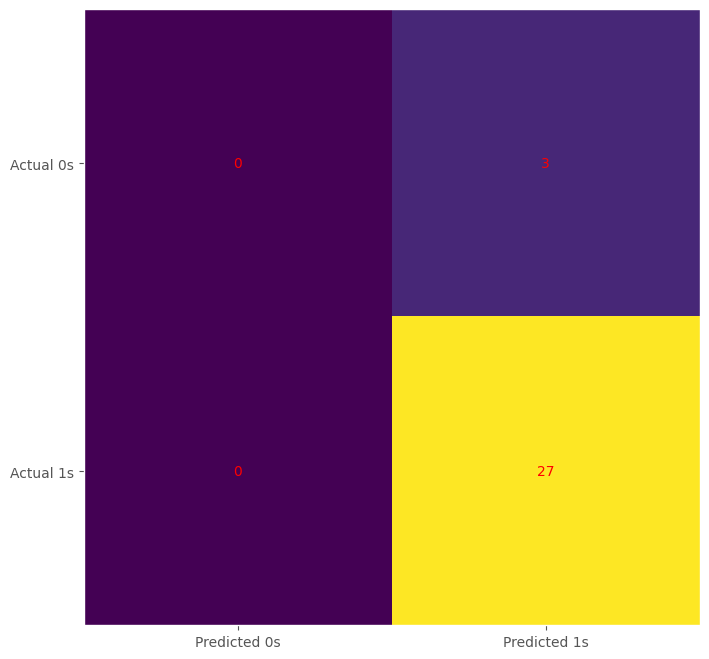

In [117]:
y_predict=reg.predict(x_test_tfidf)
y_predict_prob=reg.predict_proba(x_test_tfidf)[:,1]

#testing data size was .3 so should have 30 data points
confusion_matrix_plot(y_test,y_predict)